In [1]:
#Plot for the duopoly price discrimination model with loyalty and costs: Infinite horizon Mult Loyalty ML case
#this is applicable only for uniform F and when delta_a = delta_b = delta_F (hardcode)
#naming convention: _fm_ means firms are 'f'orward looking and customers are 'm'yopic

%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.infinite_horizon import ll_get_metric_arrs_vs_camcb
from utils.utils import *

In [2]:
#keep cb fixed
flag_theory = False
flag_plot = True
flag_retrieve_stored_df = False
flag_store_df = True
cb     = 0.2
la     =   3
lb     =   4
sa     =   0
sb     =   0
deltaf = 0.4 #common discount function
dist = 'uniform'
npts=100
if flag_theory:
    fprefix = "./output/ml_ih_fm_unc" #signifying 'unconsrtained prices'
    ca_arr = np.linspace(cb+.4,2,10) #ensure ca >= cb
else:
    fprefix = "./output/ml_ih_fm_c" #signifying 'consrtained prices'
    ca_arr = np.linspace(cb,4,20) #ensure ca >= cb
ca_m_cb_arr = ca_arr - cb
maxpx=ca_arr.max()+5

In [3]:
if flag_retrieve_stored_df is True:
    df = pd.read_pickle(fprefix+'.pkl')
else:
    df = ll_get_metric_arrs_vs_camcb(dist,deltaf, ca_arr,cb,la,lb,sa,sb,flag_theory=flag_theory,maxpx=maxpx,npts=npts,show_progress=False,plot_path=False)
    if flag_store_df is True:
        df.to_pickle(fprefix+'.pkl')

ml_get_metric_arrs_vs_camcb_nodf start:  2021-02-08 19:44:23.417198
i,ca,time:  0 0.2 2021-02-08 19:44:23.417617
i,ca,time:  1 0.4 2021-02-08 19:44:49.064761
i,ca,time:  2 0.6 2021-02-08 19:45:33.612388
i,ca,time:  3 0.8 2021-02-08 19:47:04.144514
i,ca,time:  4 1.0 2021-02-08 19:47:58.386618
i,ca,time:  5 1.2 2021-02-08 19:50:15.795259
i,ca,time:  6 1.4 2021-02-08 19:50:49.751799
i,ca,time:  7 1.6 2021-02-08 19:51:20.276545
i,ca,time:  8 1.8 2021-02-08 19:52:25.537267
i,ca,time:  9 2.0 2021-02-08 19:53:00.146349
i,ca,time:  10 2.2 2021-02-08 19:53:41.144871
i,ca,time:  11 2.4 2021-02-08 19:55:53.811250
i,ca,time:  12 2.6 2021-02-08 19:56:39.419069
i,ca,time:  13 2.8 2021-02-08 19:57:33.075525
i,ca,time:  14 3.0 2021-02-08 19:58:37.154019
i,ca,time:  15 3.2 2021-02-08 19:59:35.843767
i,ca,time:  16 3.4 2021-02-08 20:05:43.843346
i,ca,time:  17 3.6 2021-02-08 20:08:41.933210
i,ca,time:  18 3.8 2021-02-08 20:13:31.753333
i,ca,time:  19 4.0 2021-02-08 20:17:00.618100
ml_get_metric_arrs_vs_

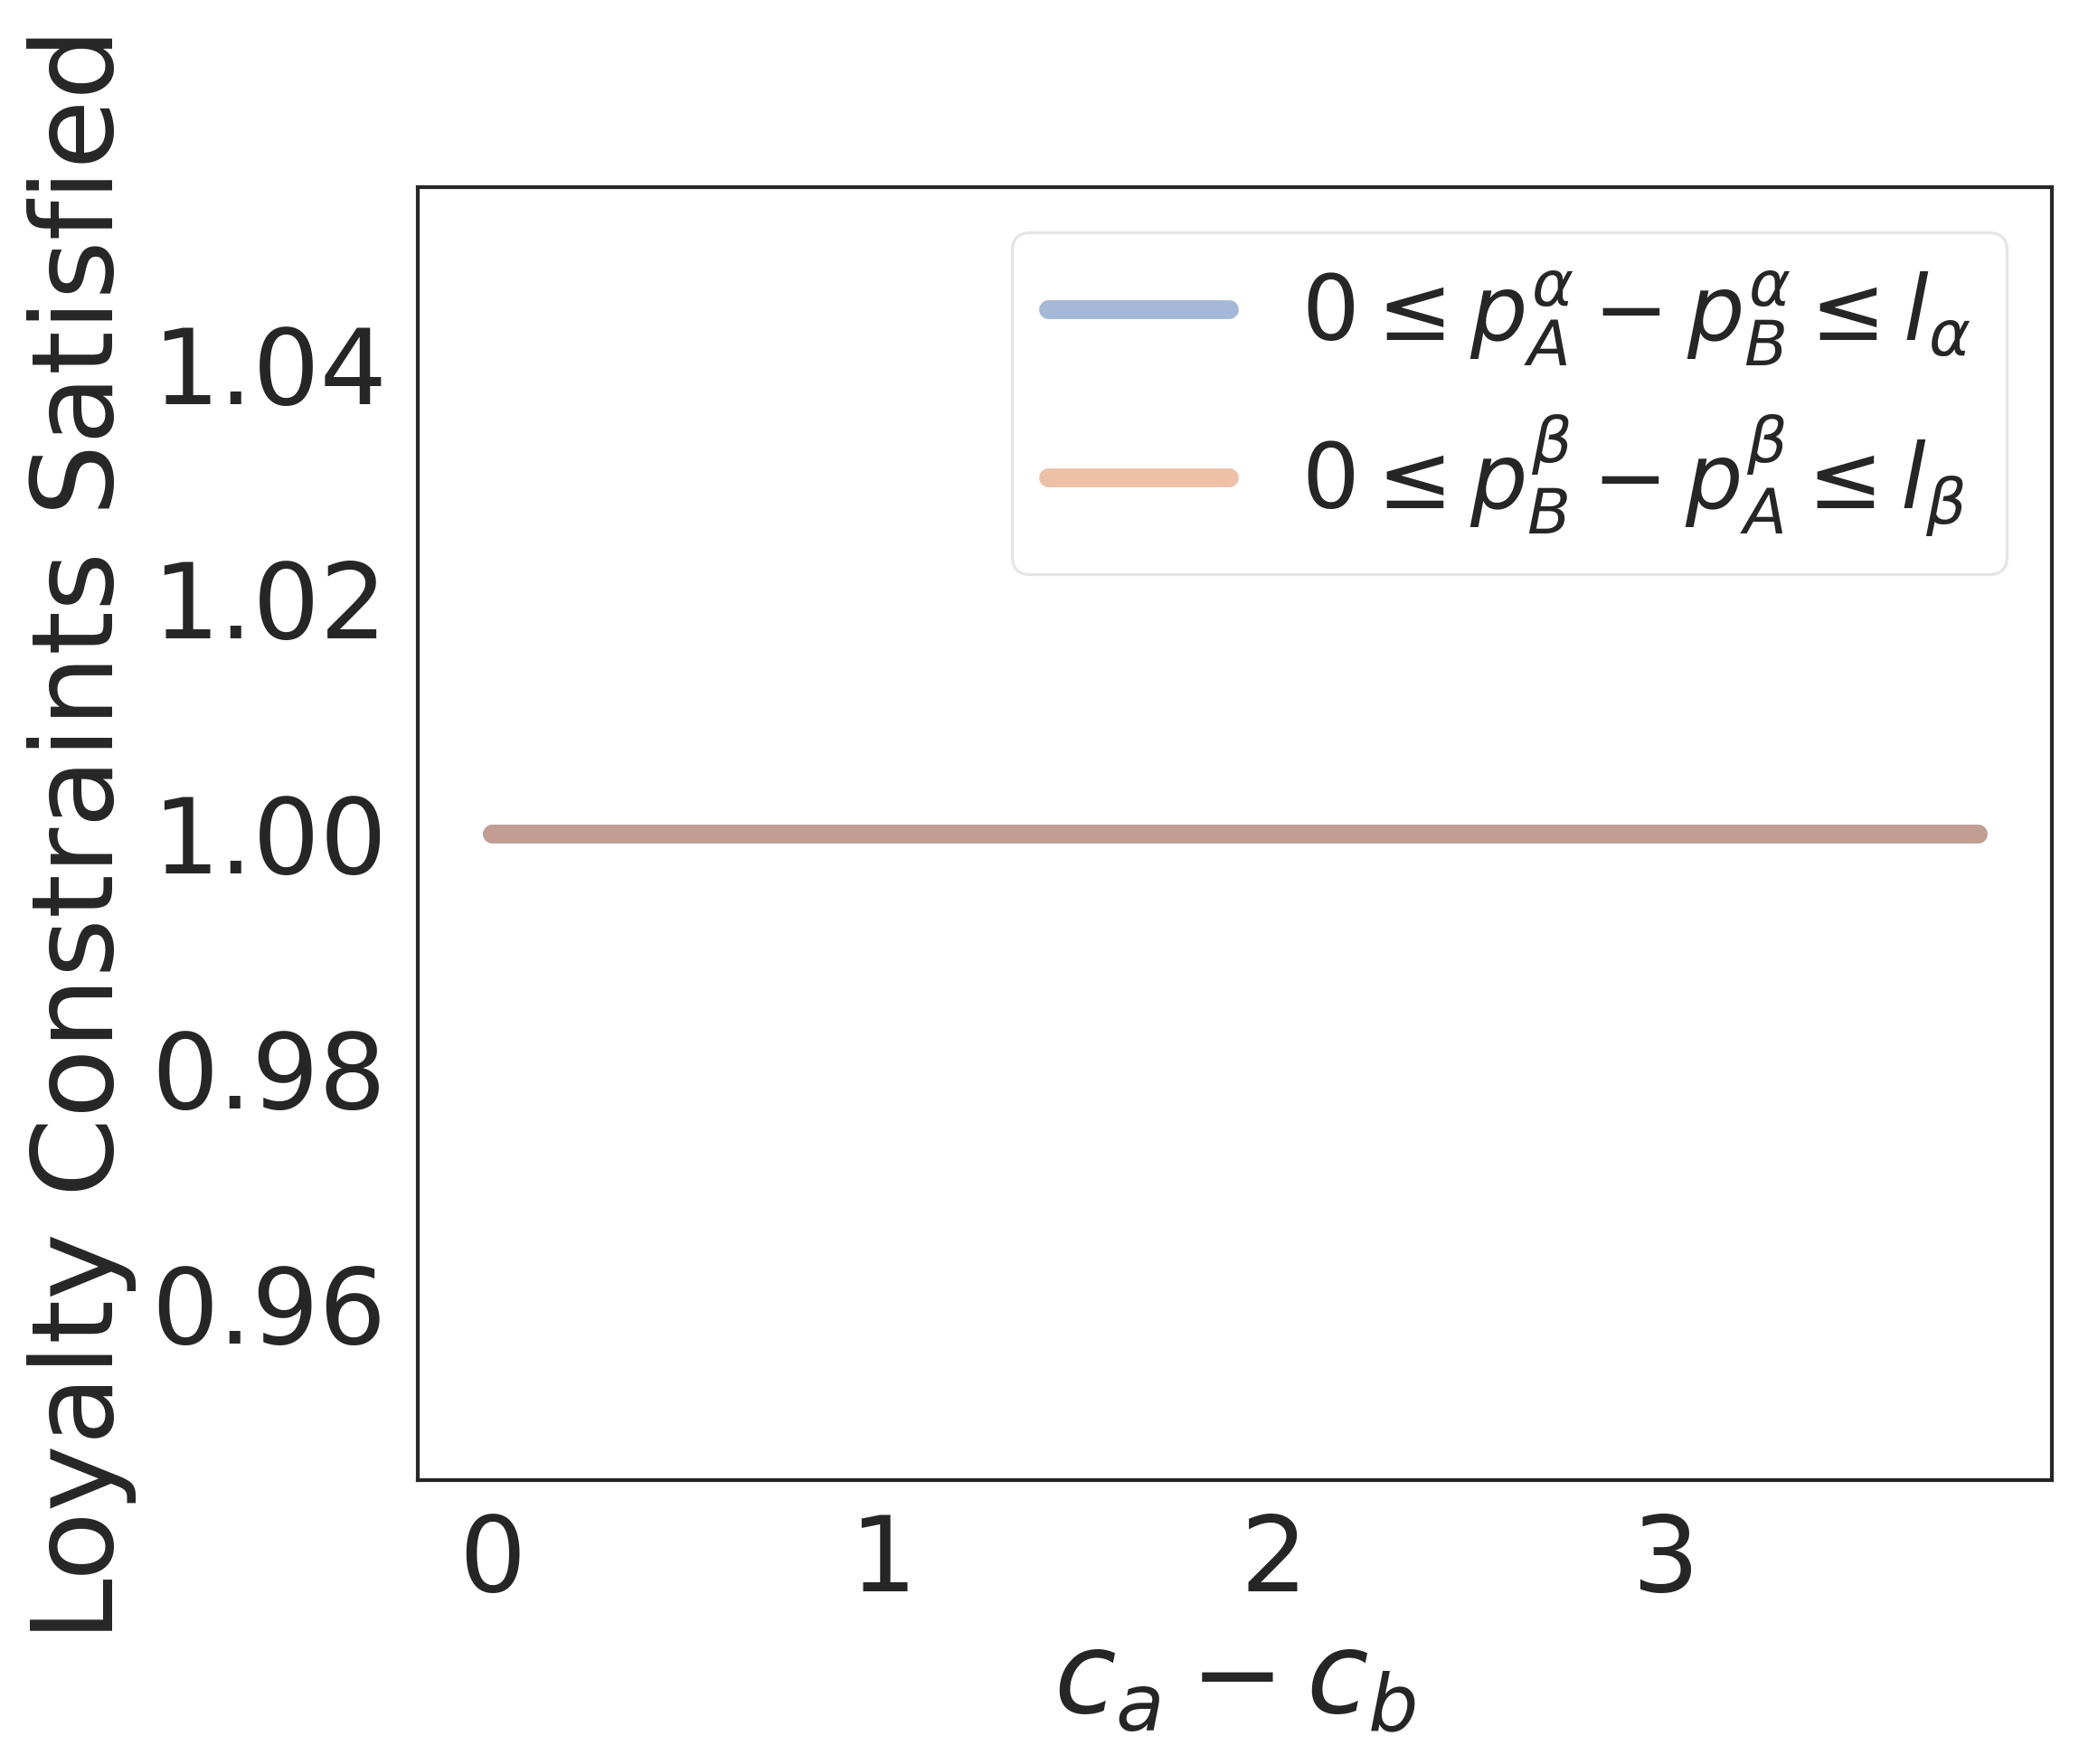

In [4]:
# plot of price constraints indicator functions
labels_constraints_ml=[r'$0 \leq p_{A}^{\alpha} - p_{B}^{\alpha} \leq l_{\alpha}$',r'$0 \leq p_{B}^{\beta} - p_{A}^{\beta} \leq l_{\beta}$']
fname_constraints_ml = fprefix+"_constraints_ml.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_aa_ba_arr'],df['constraint_bb_ab_arr'],ca_m_cb_arr,'Loyalty Constraints Satisfied',labels_constraints_ml,None,None,fname_constraints_ml)

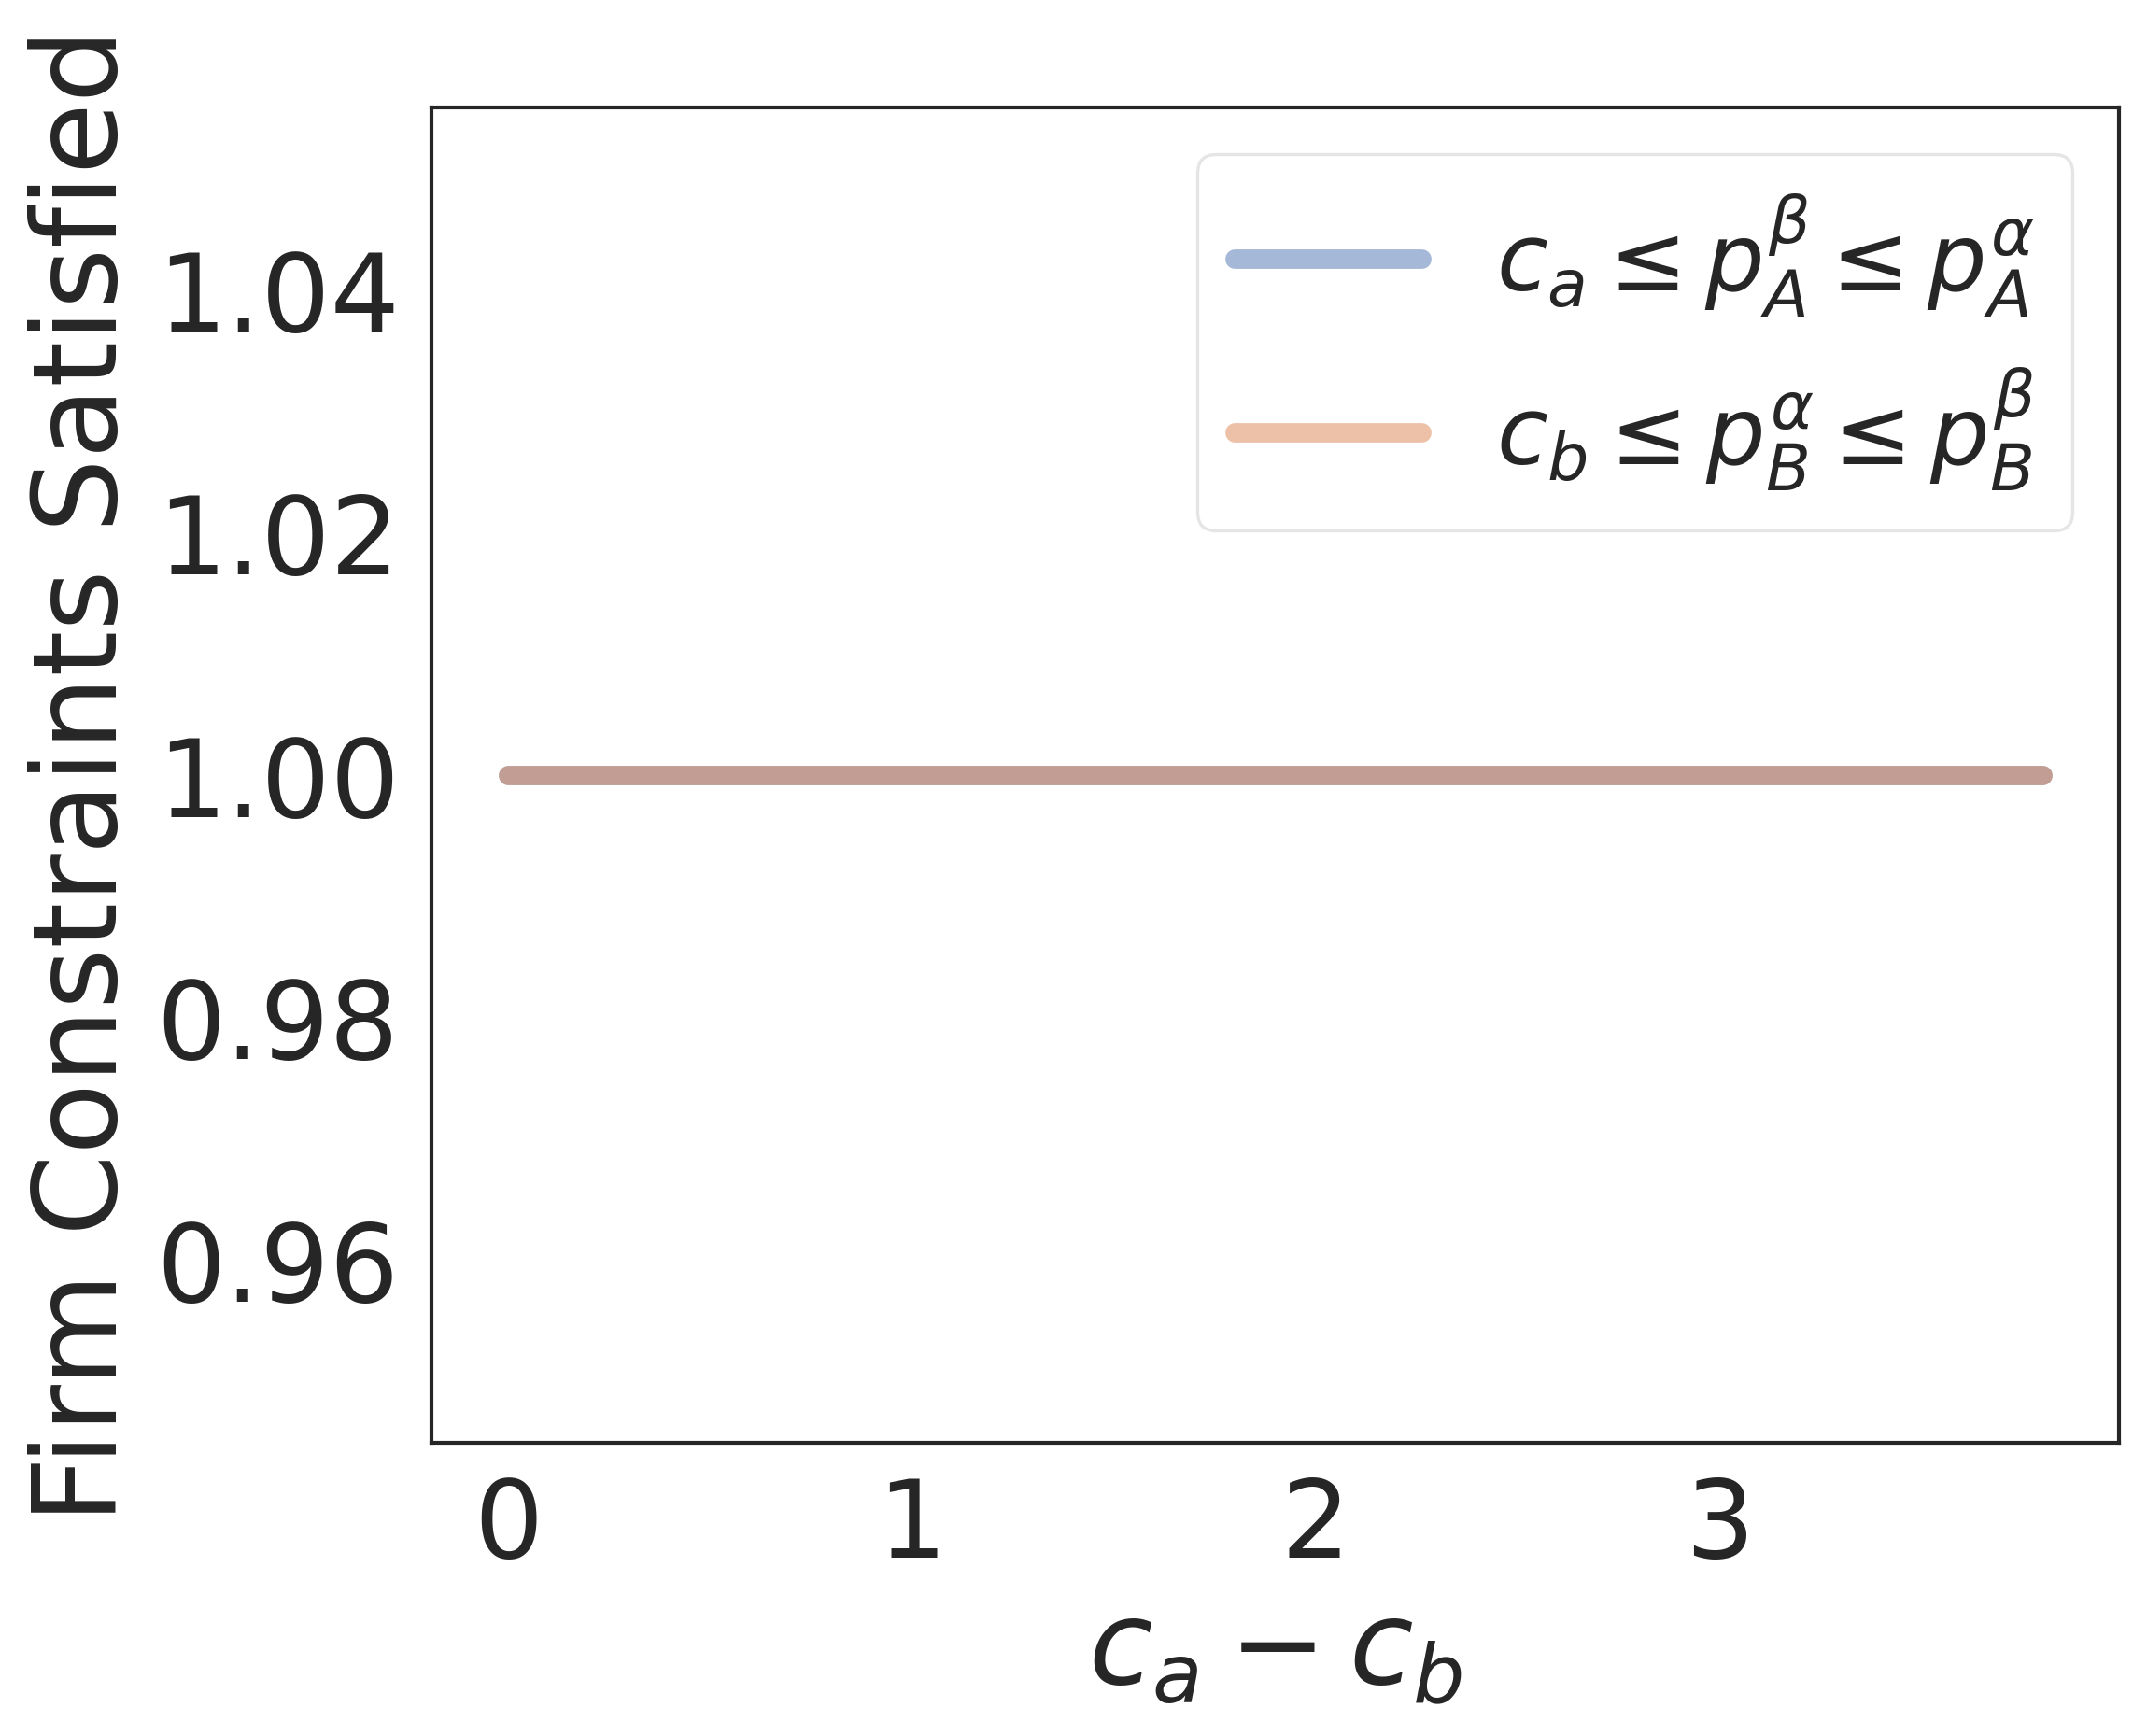

In [5]:
# plot of price constraints indicator functions
labels_constraints_firm=[r'$c_a \leq p_{A}^{\beta} \leq p_{A}^{\alpha}$',r'$c_b \leq p_{B}^{\alpha} \leq p_{B}^{\beta}$']
fname_constraints_firm = fprefix+"_constraints_firm.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_cross_a_arr'],df['constraint_cross_a_arr'],ca_m_cb_arr,'Firm Constraints Satisfied',labels_constraints_firm,None,None,fname_constraints_firm)

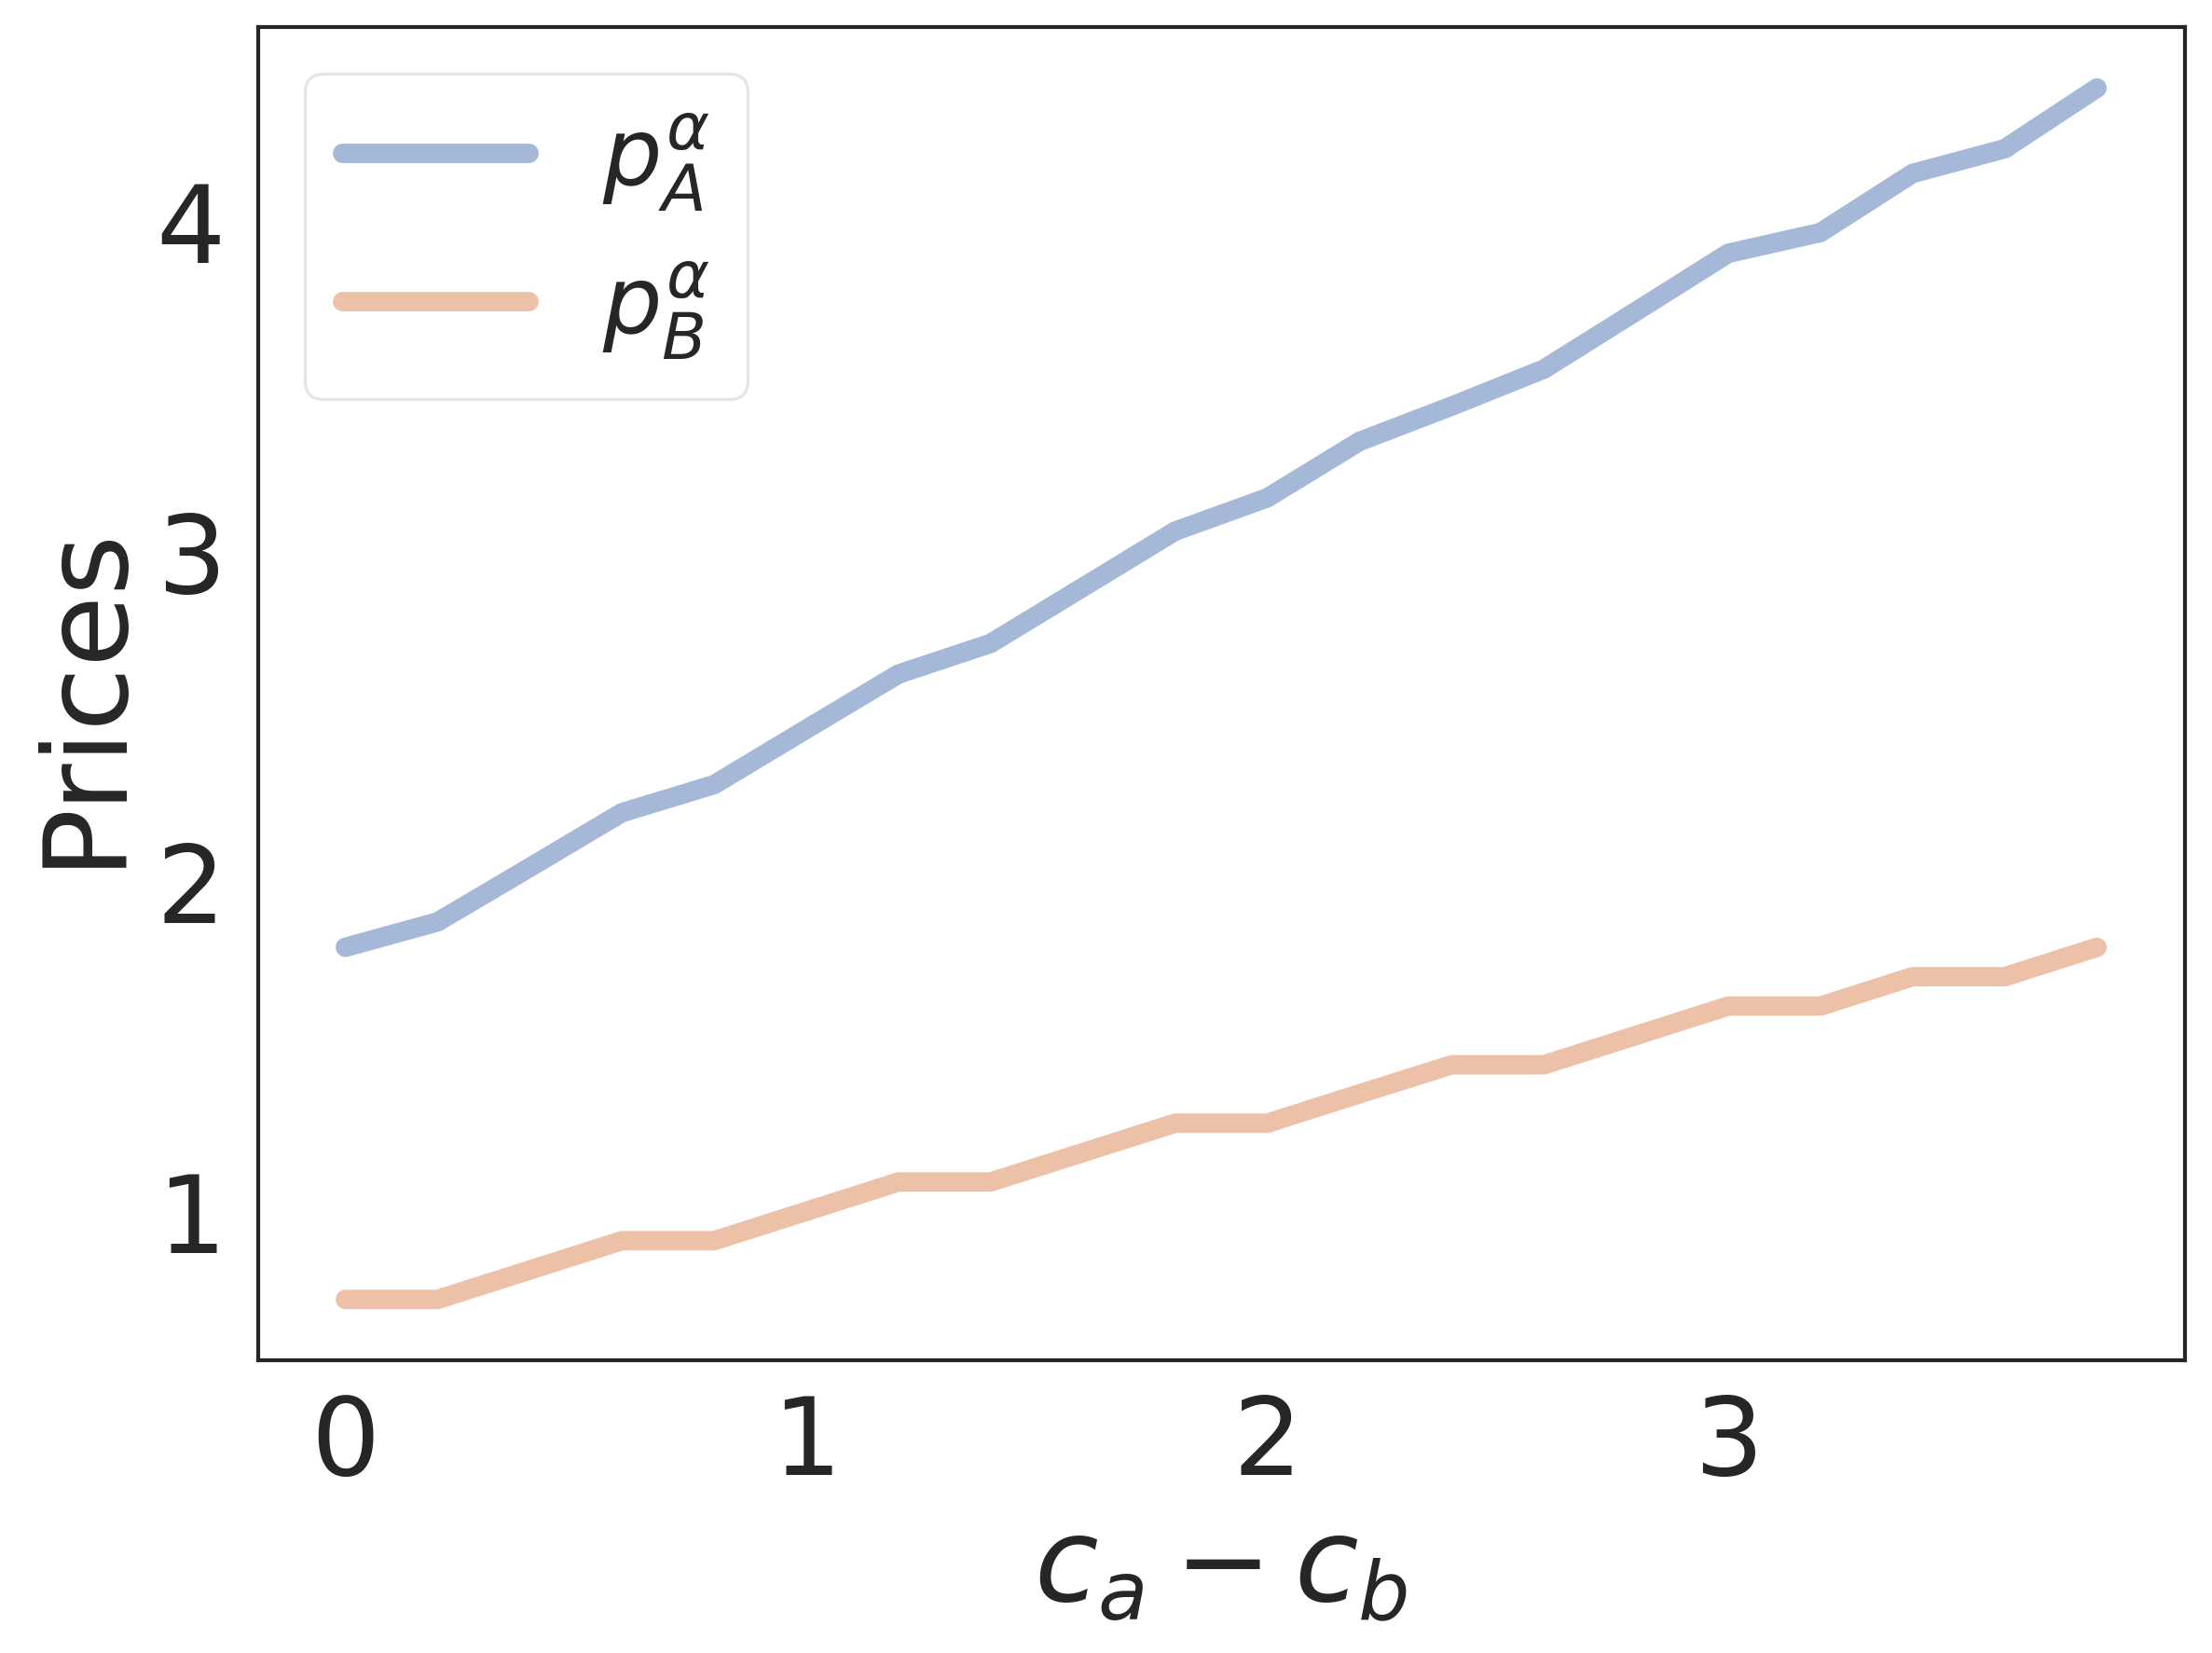

In [6]:
# plot of prices paa and pba
labels_prices_a=[r'$p_{A}^{\alpha}$',r'$p_{B}^{\alpha}$']
fname_prices_a = fprefix+"_paa_pba.png" if flag_plot else None
plot_curves_vs_camcb(df['paa'],df['pba'],ca_m_cb_arr,'Prices',labels_prices_a,None,None,fname_prices_a)

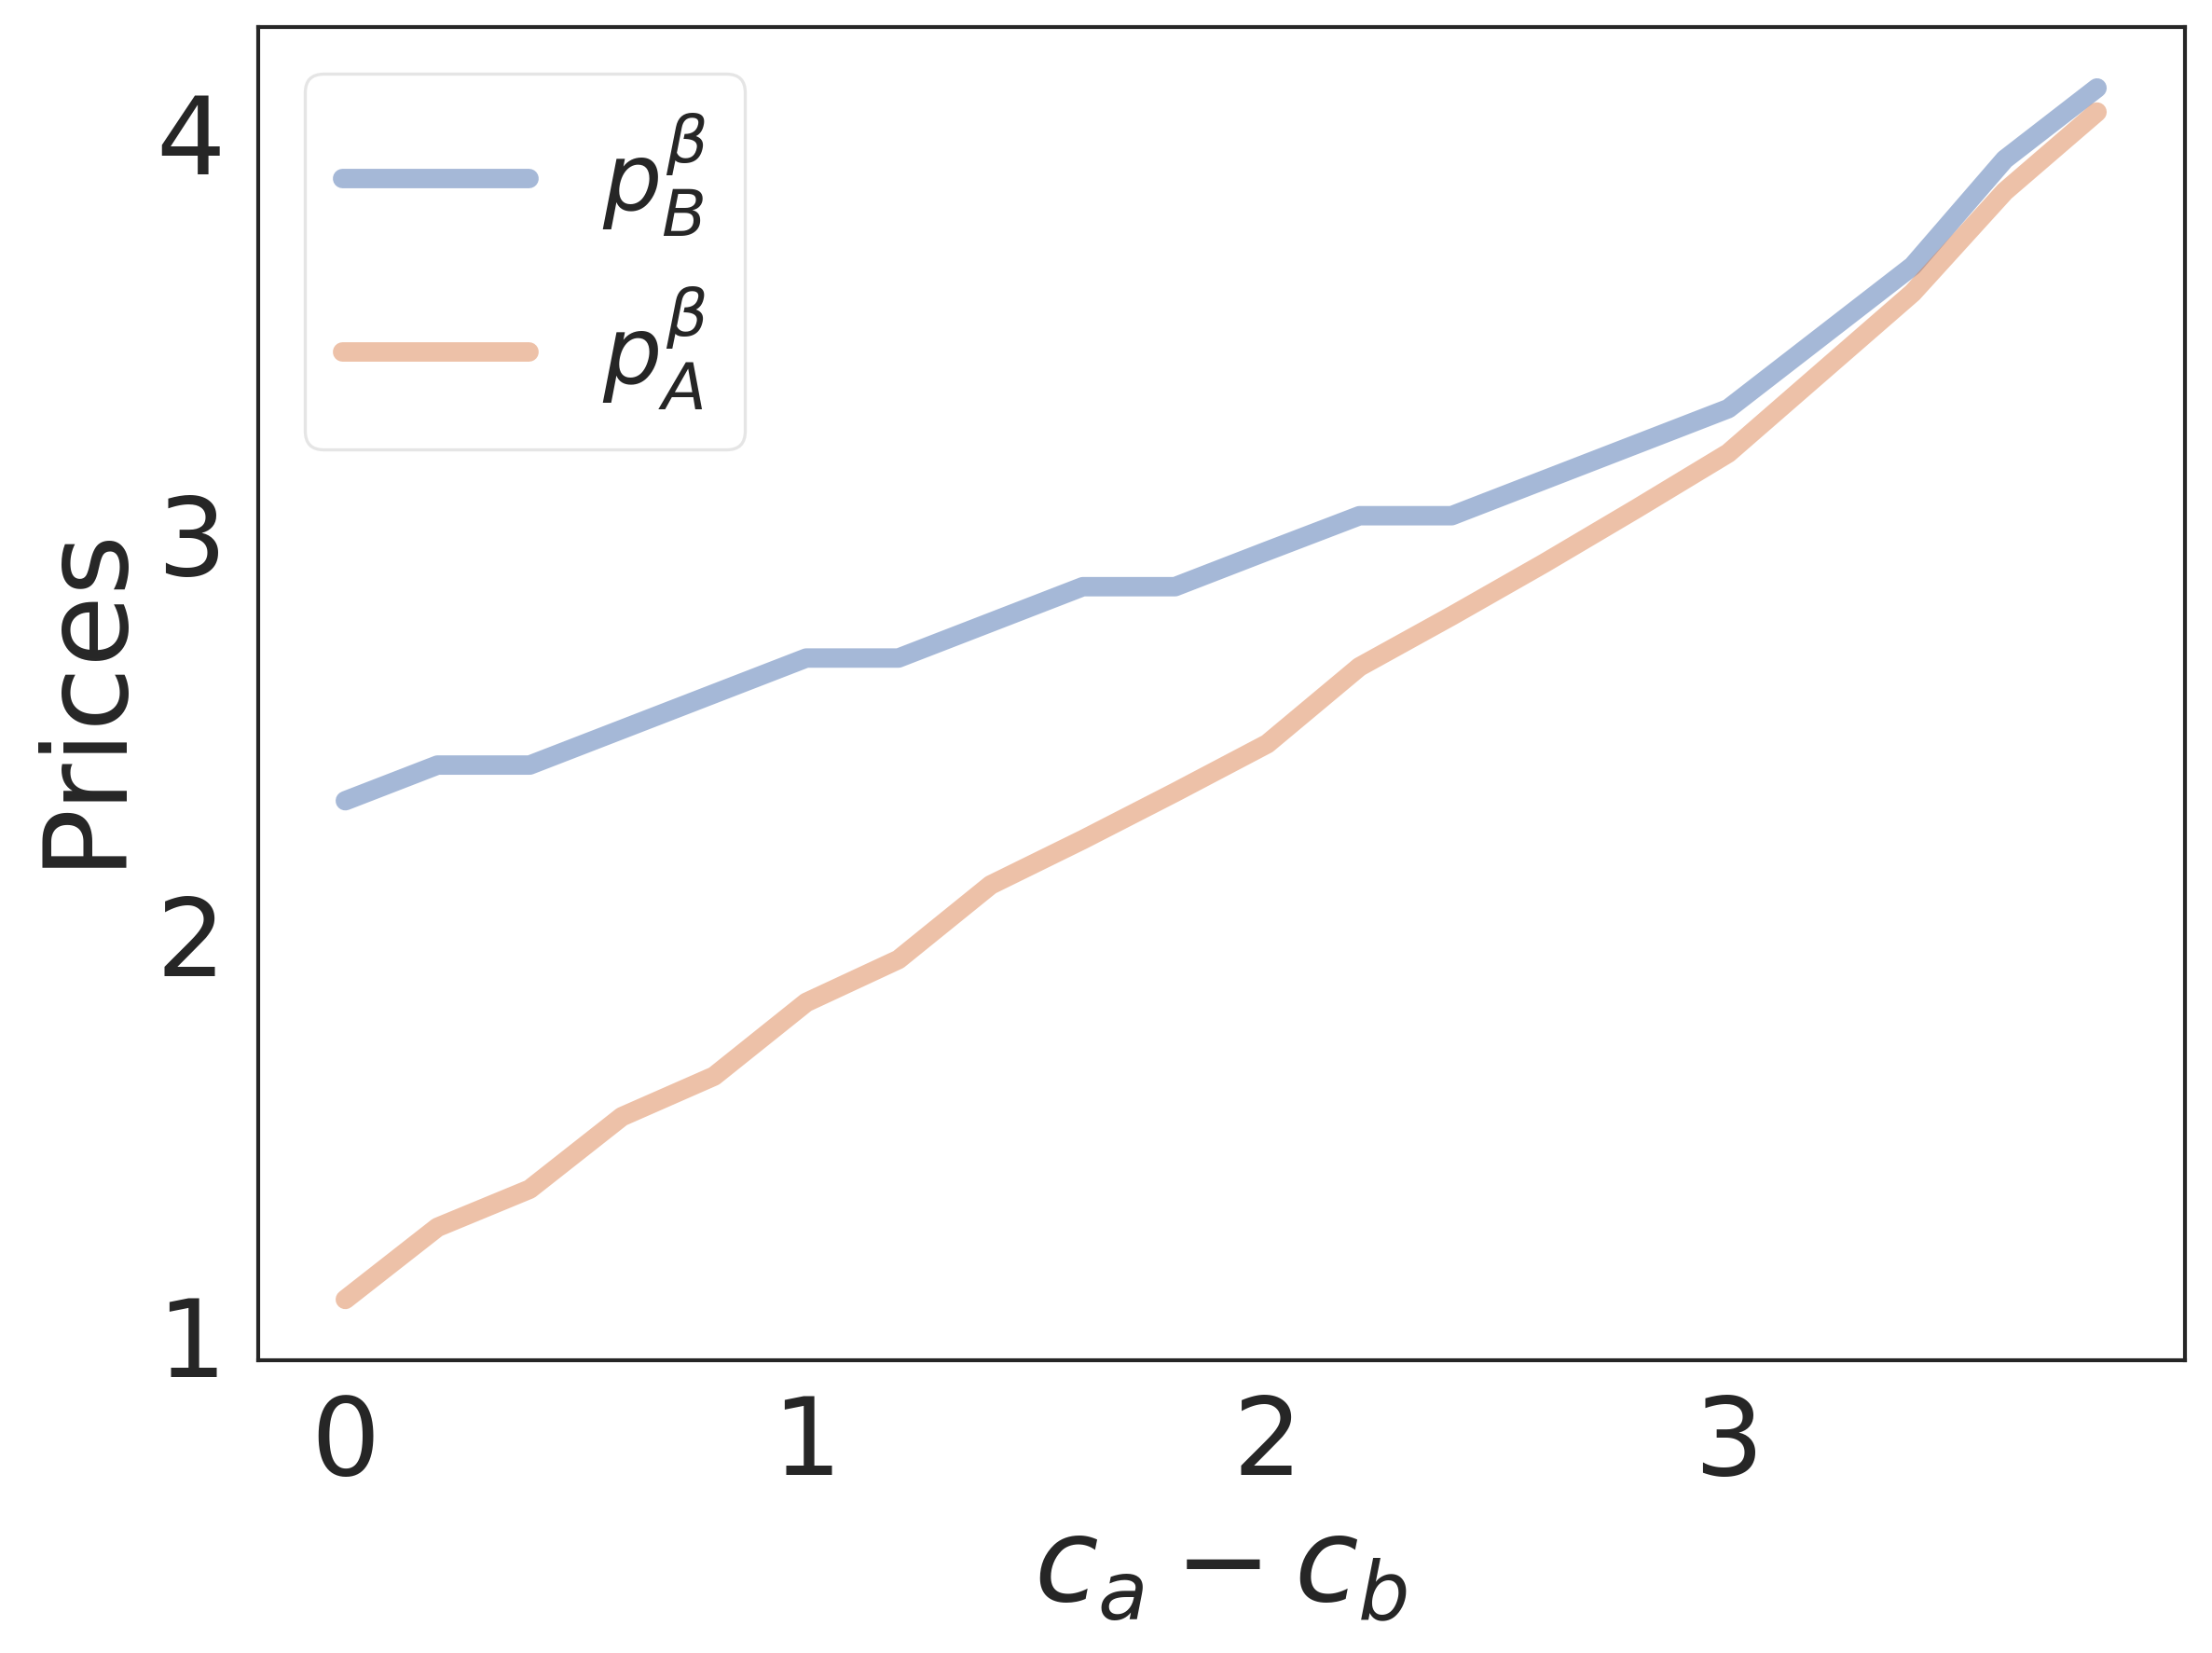

In [7]:
# plot of prices pbb and pab
labels_prices_b=[r'$p_{B}^{\beta}$',r'$p_{A}^{\beta}$']
fname_prices_b = fprefix+"_pbb_pab.png" if flag_plot else None
plot_curves_vs_camcb(df['pbb'],df['pab'],ca_m_cb_arr,'Prices',labels_prices_b,None,None,fname_prices_b)

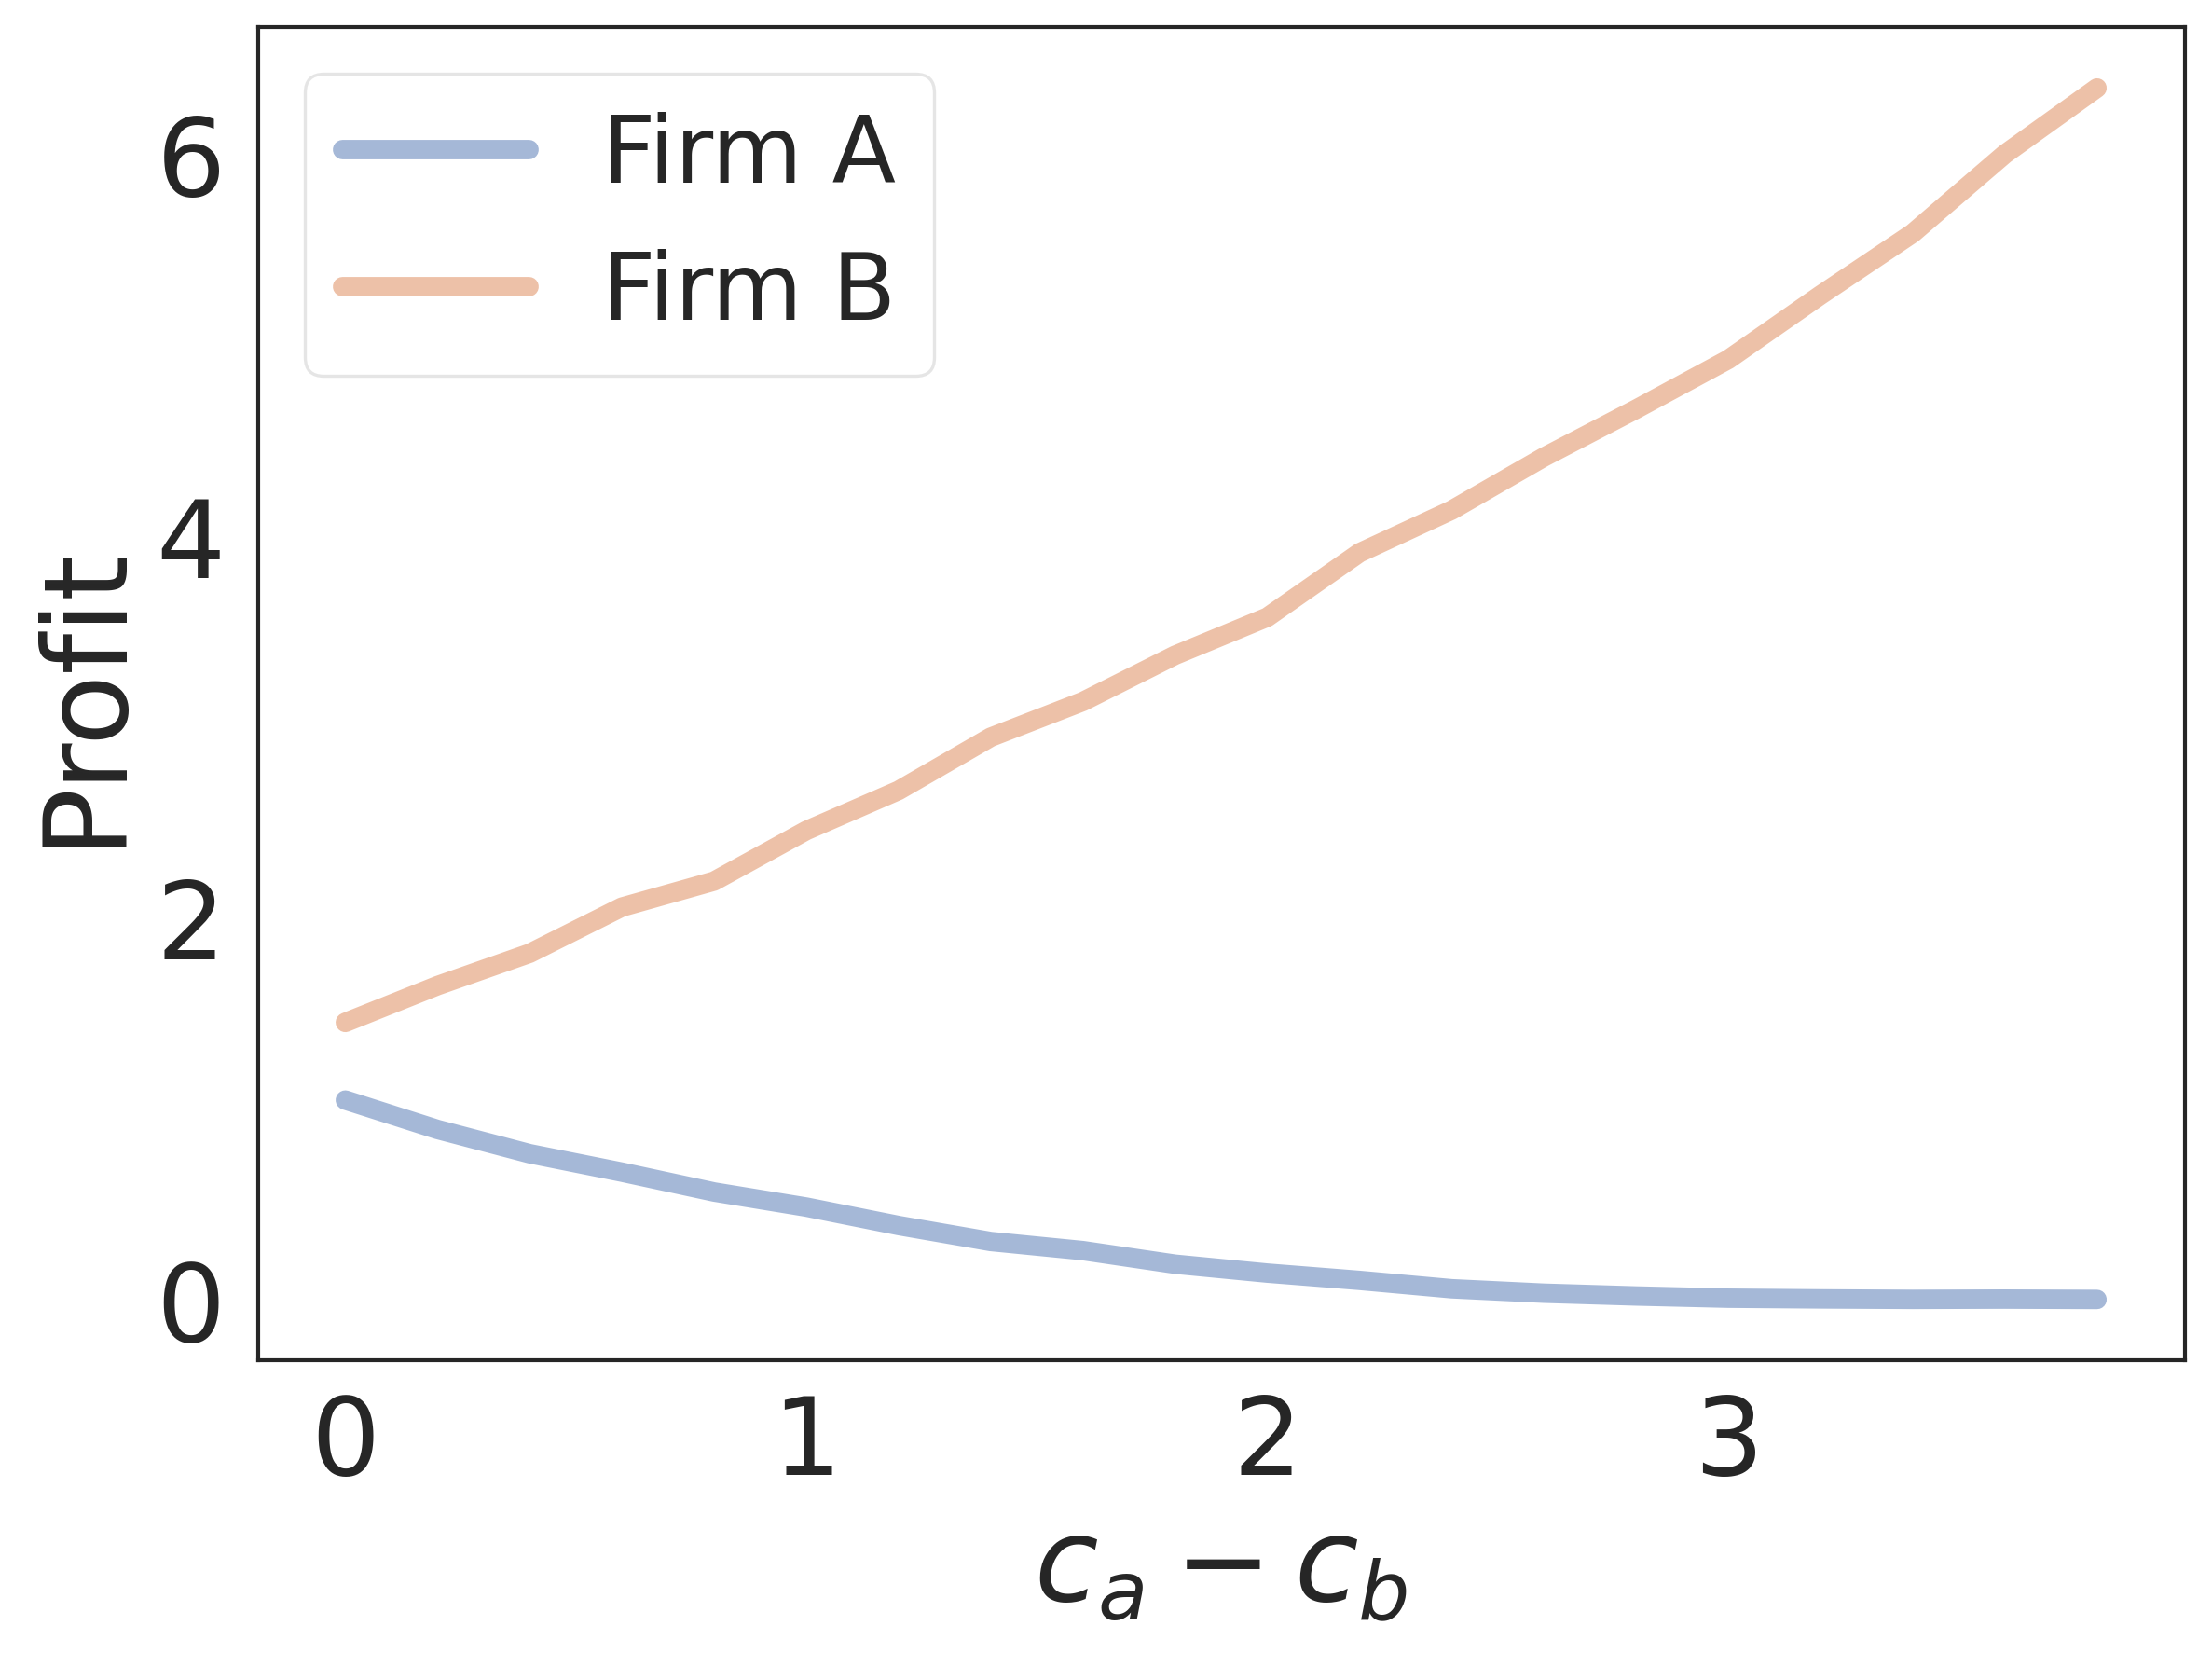

In [8]:
# plot of profits for firm A and B
labels_profit=[r'Firm A',r'Firm B']
fname_profit = fprefix+"_profits.png" if flag_plot else None
plot_curves_vs_camcb(df['total_profit_a'],df['total_profit_b'],ca_m_cb_arr,'Profit',labels_profit,None,None,fname_profit)

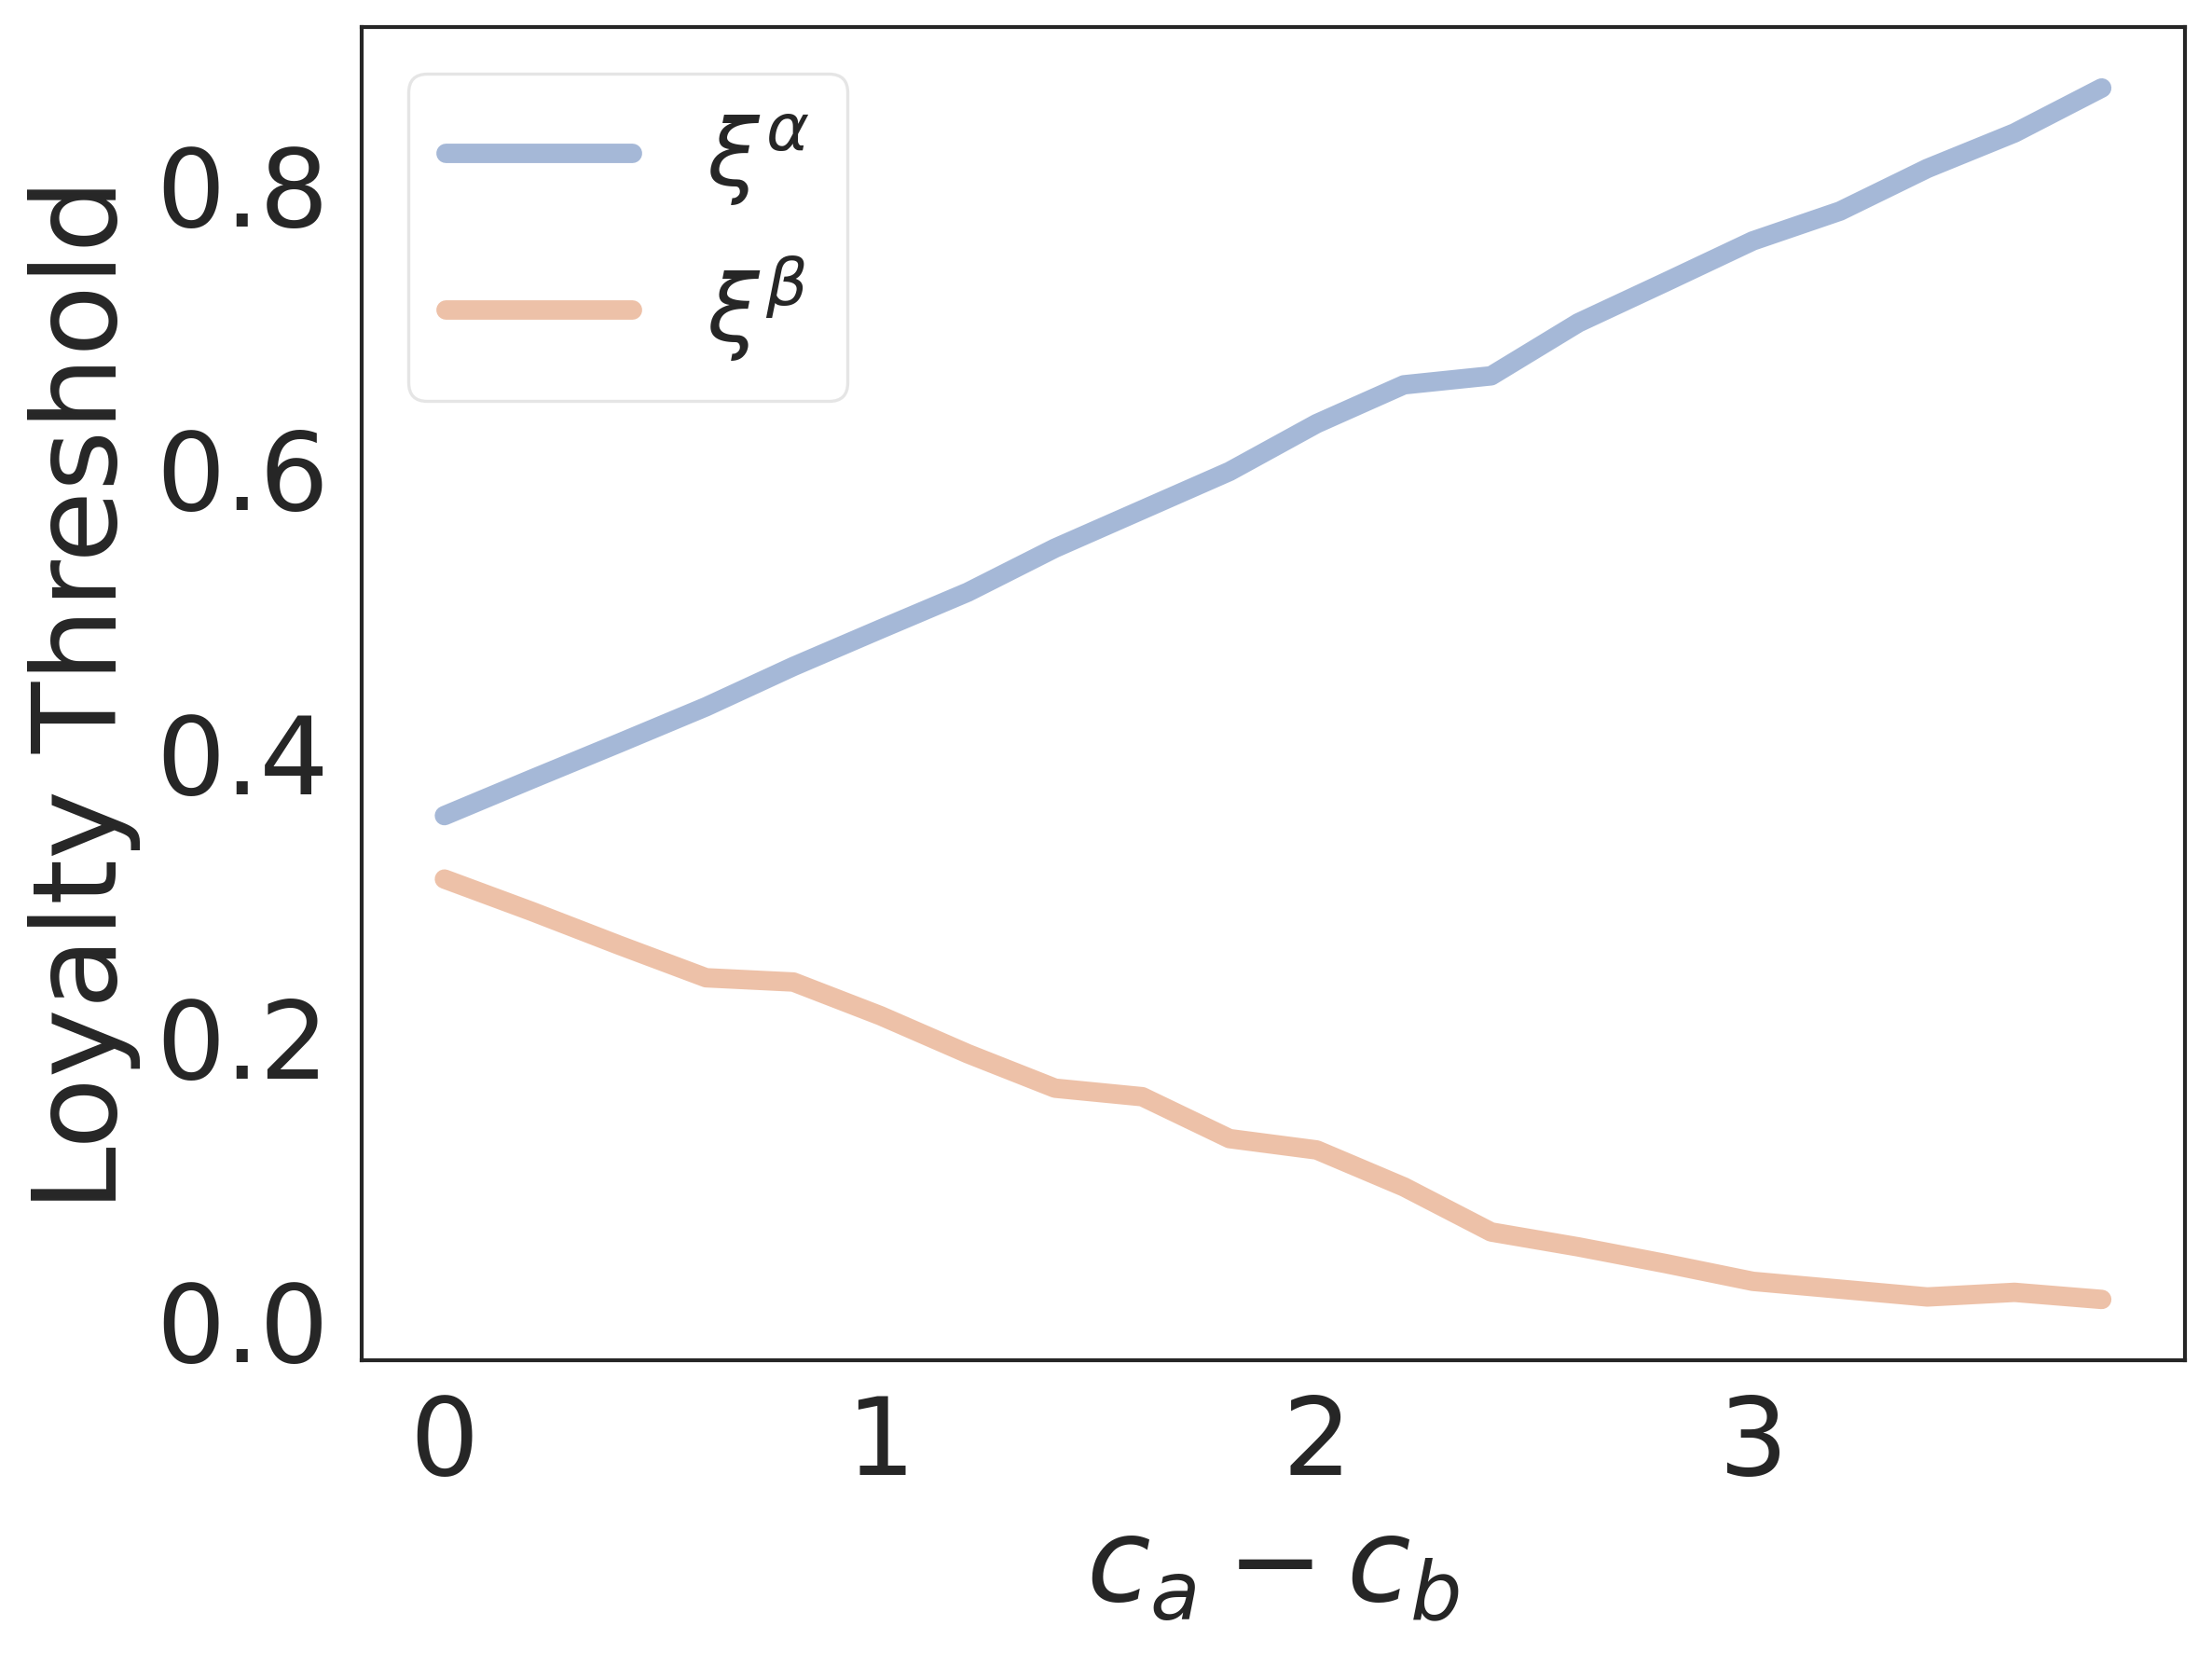

In [9]:
# plot of xia and xib
labels4=[r'$\xi^{\alpha}$',r'$\xi^{\beta}$']
fname_xis = fprefix+"_xis.png" if flag_plot else None
plot_curves_vs_camcb(df['xia'],df['xib'],ca_m_cb_arr,'Loyalty Threshold',labels4,None,None,fname_xis)

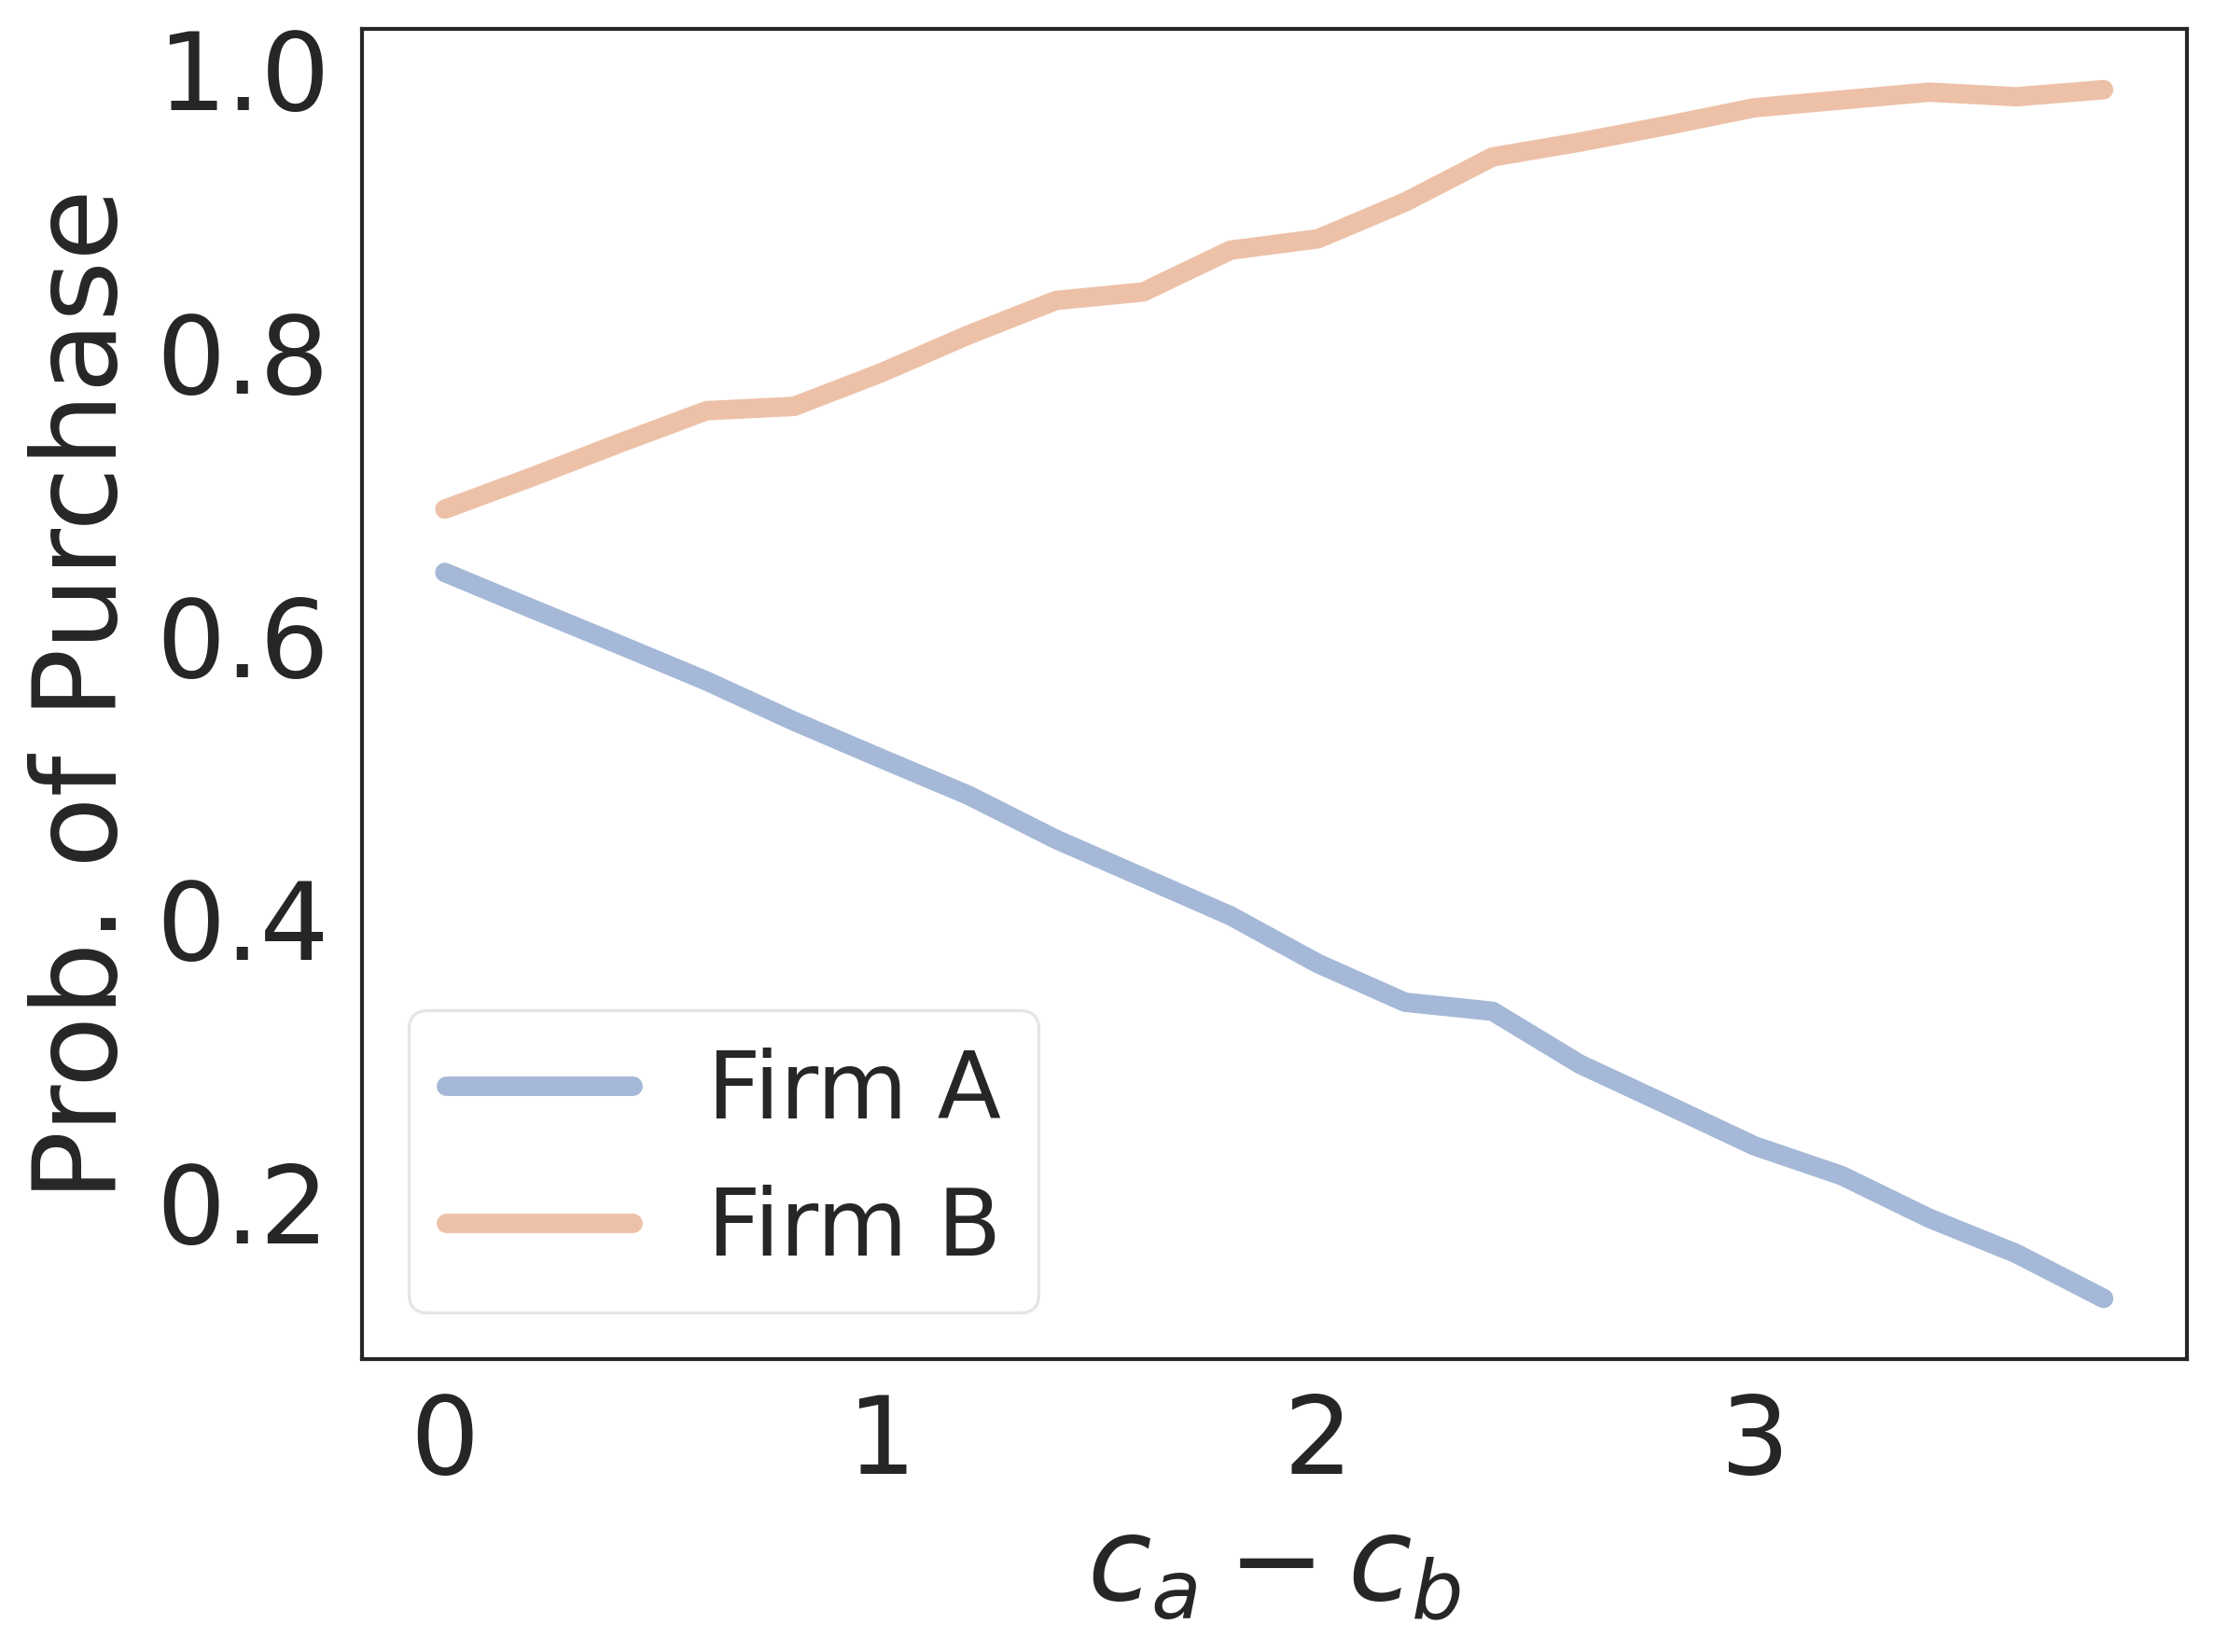

In [10]:
# plot of prob of purchase of loyal
labels_probabilities=[r'Firm A',r'Firm B']
fname_probabilities = fprefix+"_probabilities.png" if flag_plot else None
plot_curves_vs_camcb(df['prob_purchase_a_from_a'],df['prob_purchase_b_from_b'],ca_m_cb_arr,'Prob. of Purchase',labels_probabilities,None,None,fname_probabilities)

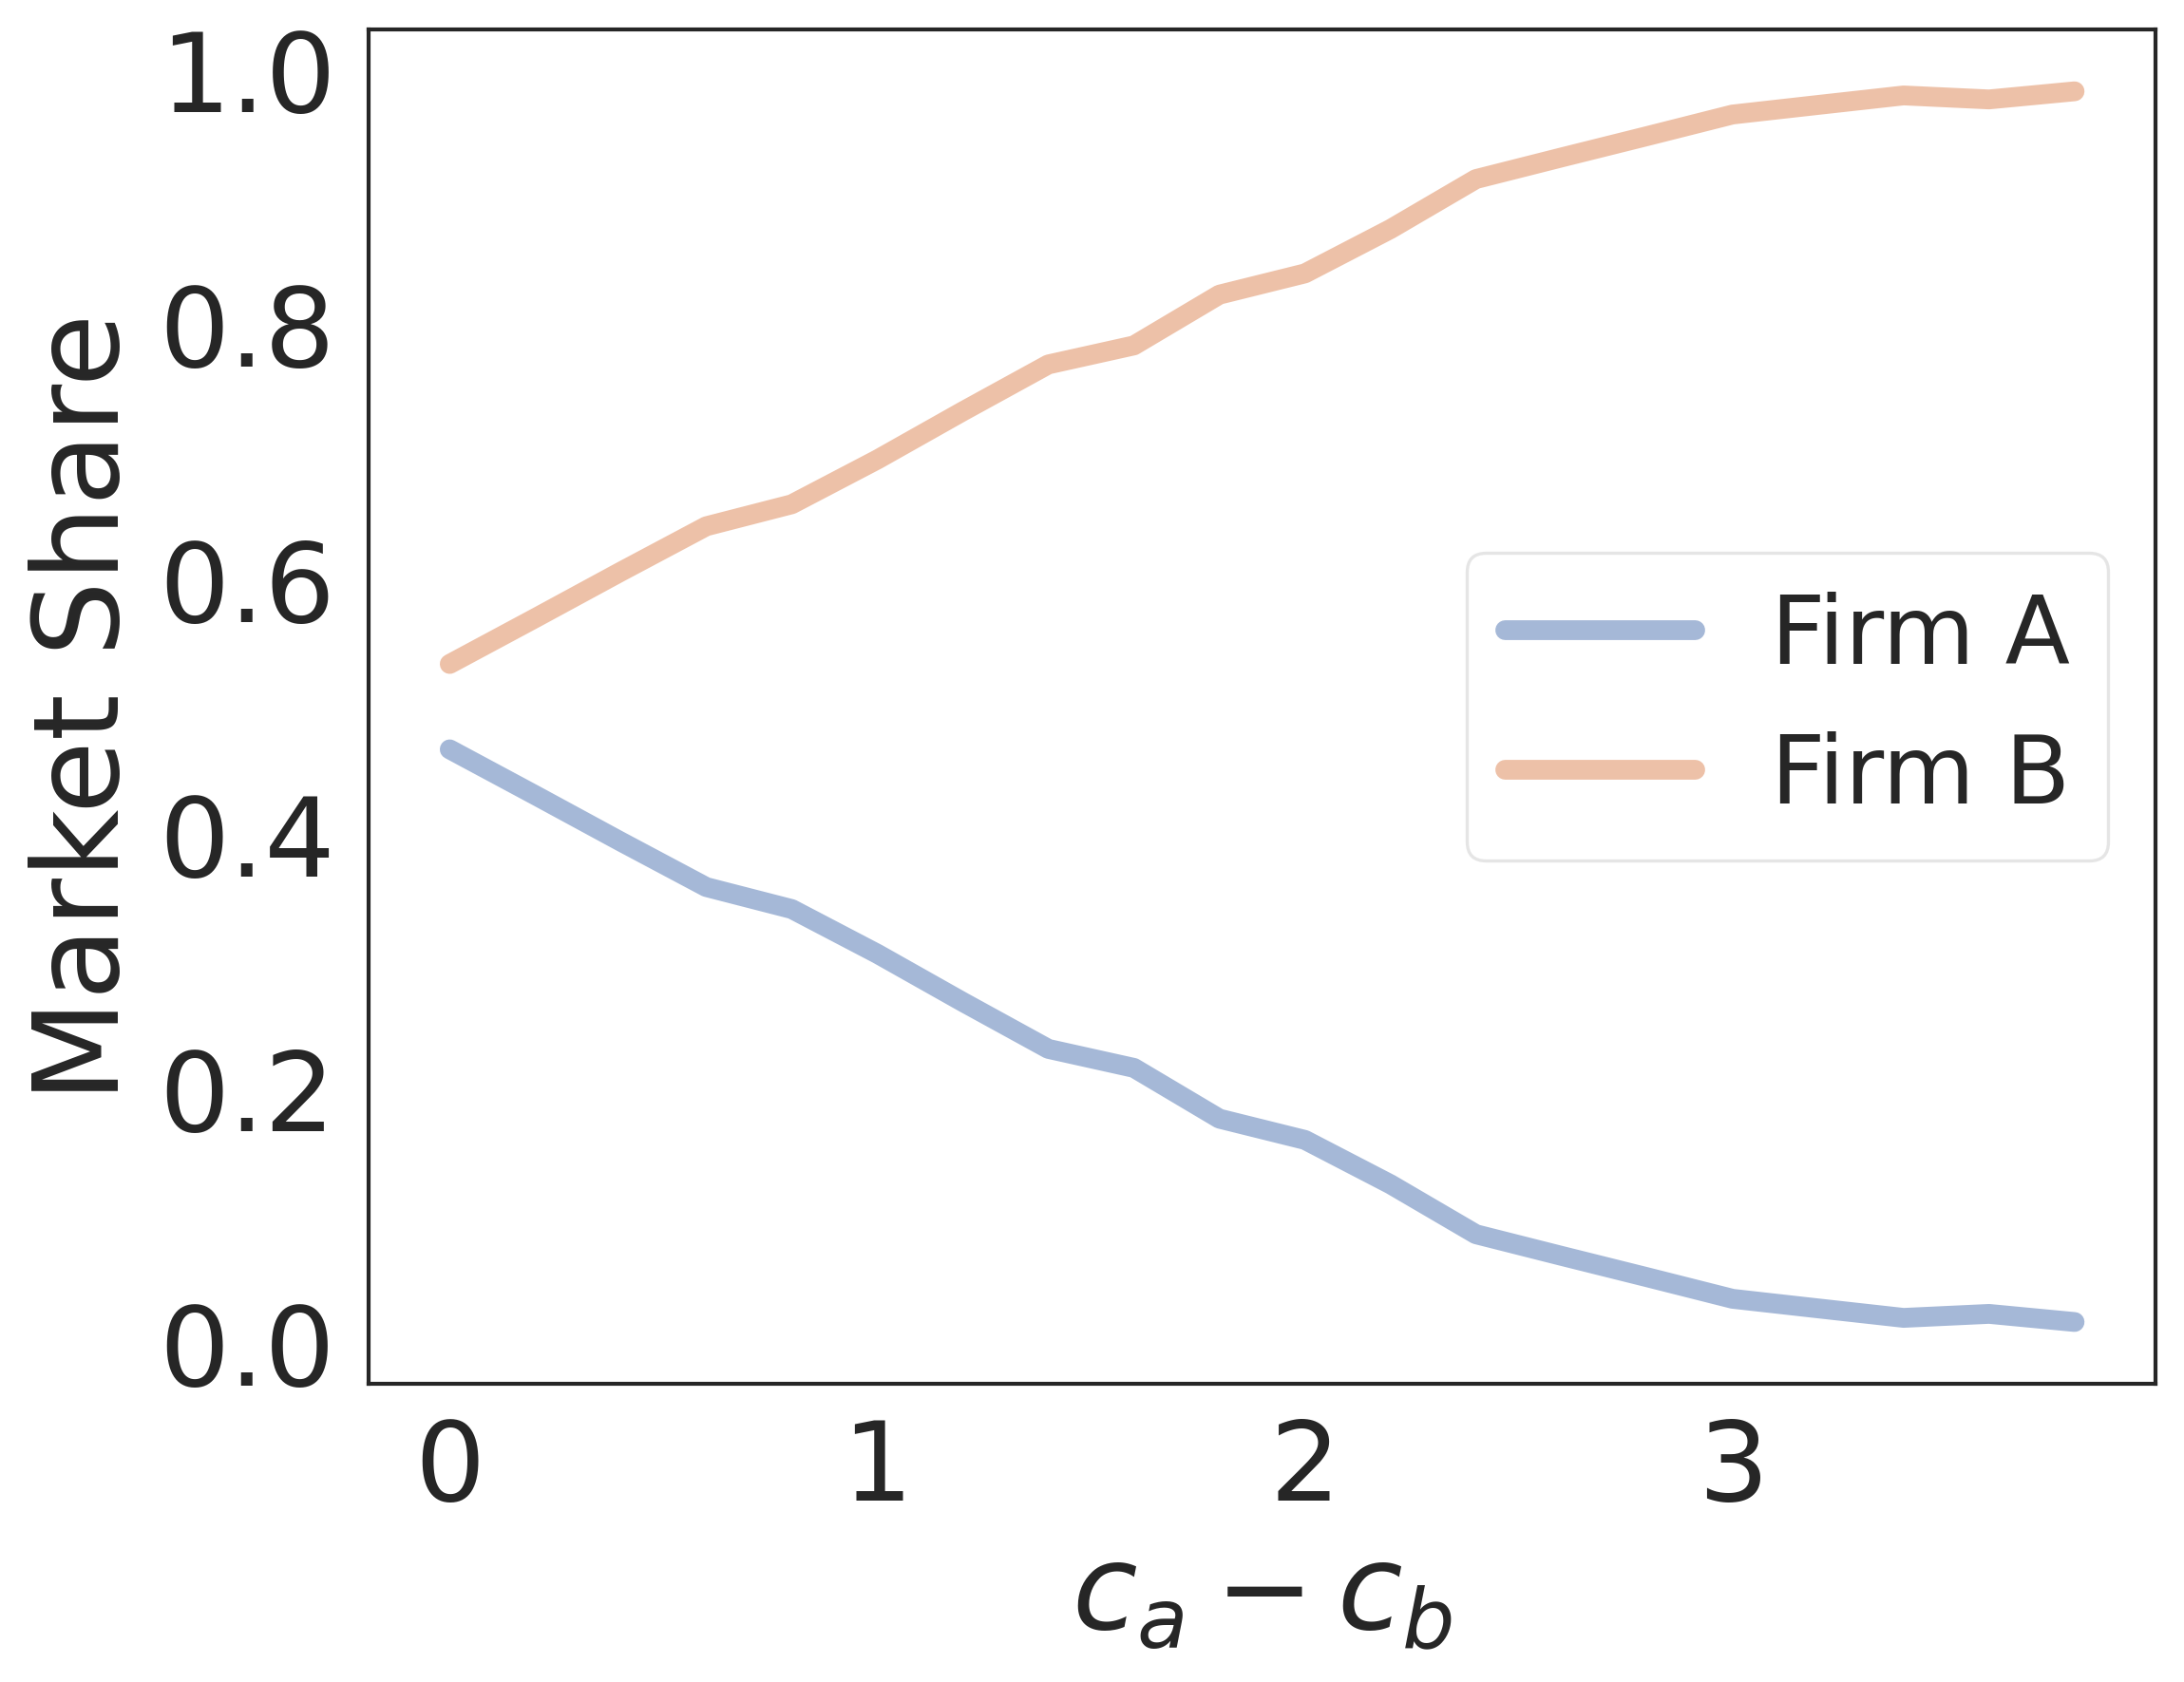

In [11]:
# plot of market share
labels_mkt=[r'Firm A',r'Firm B']
fname_mkt = fprefix+"_mkt.png" if flag_plot else None
plot_curves_vs_camcb(df['marketshare_a'],df['marketshare_b'],ca_m_cb_arr,'Market Share',labels_mkt,None,None,fname_mkt)